In [ ]:
#1. Setup and Load Data

In [ ]:
# 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [83]:
import tensorflow as tf
import os

In [ ]:
#remove dodgy images

In [84]:
import cv2
import imghdr

In [85]:
data_dir='data'

In [86]:
os.listdir(os.path.join(data_dir,'Pandas'))

['0413_pandas-1000x668.jpeg',
 '1280px-Atlanta_Zoo_Panda-1024x682.jpg',
 '2753e791-dbf4-41cc-9482-5d60dc1f5bd1.jpg',
 '33066d64dc5f216e0d0b6bad18aaa75b.jpg',
 '3n8tRry6fYg7sNyhFDPQwR-1200-80.jpg',
 '408504.jpg',
 '53441799-1.jpg',
 '6b3357a1053447a1b6d6548b1a057bbf-6b3357a1053447a1b6d6548b1a057bbf-1_1612407530360_1612407536806.jpg',
 '826a518ea9fc46d4b5adcc38_cut_800x500_61.jpg',
 '8du45vs2a6_Peek___Giand_Panda_cub__Bifengxia_Panda_Base__Sichuan__China__2014___4CN14_9263.jpg',
 '8u3k0zn66i_Large_WW170579.jpg',
 'animal-1236875__480.jpg',
 'cbufln3o_chinese-panda-in-qatar-afp_295x200_20_October_22.jpg',
 'china-panda-bear-cub-baby-sit-in-stone-in-zoo-nature-around-with-bamboo-PYTG59.jpg',
 'd2ffab902f8740e002b788d73e108ca1.jpg',
 'Giant-panda-animal-mammal.jpg',
 'Giant-panda-bamboo-forest-Sichuan-China-province.jpg',
 'Giant-panda-bamboo.jpg',
 'giant-panda-bear-in-beijing-capital-city-of-china-TWGJ2A.jpg',
 'giant-panda-bear-in-china-PJ9XYW.jpg',
 'giant-panda-sitting-on-a-rock-at-bei

In [87]:
os.listdir(os.path.join(data_dir,'Grizzly'))

['0821_loc_hhn_grizzly_t1170.jpg',
 '092353.jpg',
 '11282022_Grizzly_Bears-Woodland_Park_Zoo_153853.jpg',
 '1627942472414.jpeg',
 '170622-yellowstone-grizzley-bear-ew-250p.jpg',
 '213c101dca7243ff7d5fcc1d6151f60d.jpg',
 '220px-Grizzly_Pair_at_the_Cleveland_Zoo.jpg',
 '221110-grizzly-bear-yellowstone-mjf-1514-260ecf.jpg',
 '28564681_web1_220331-GOS-boo_1.jpg',
 '360_F_552678038_q3HFtPNcJ26dBaVIHzSSoM1e72Y6V60F.jpg',
 '36211246-Grizzly_Bear_Siblings-1024x652.jpg',
 '3box0qwlkk_brownbear_hero.jpg',
 '51736869149_154f33d873_k.jpg',
 '5c92a0493ca87.image.jpg',
 '6-40.jpg',
 '63f7a777-11d5-4ade-8a7b-d396b04c3926-Grizzly_GBAC.jpg',
 'angrybear-larsscinny2_lr.jpeg',
 'AnimalIMAGE-min.jpg',
 'Bart-the-Bear-II--e1637176991443.jpg',
 'bear-1283347__480.jpg',
 'BearSurvivalLEAD.jpg',
 'brown-bear-7591629__340.jpg',
 'DSC_1762-Edit-Edit-scaled.jpg',
 'gettyimages-1216705608.jpg',
 'graphical-grey-grizzly-bears-set-260nw-1663066972.jpg',
 'grizzlies_hero.jpg',
 'grizzly-399.jpeg',
 'Grizzly-Bear-16x

In [89]:
image_exts=['jpeg','jpg','bmp','png']

In [90]:
from matplotlib import pyplot as plt

In [91]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)
            

In [ ]:
# 1.3 Load Data

In [92]:
import numpy as np

In [93]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 844 files belonging to 2 classes.


In [94]:
data_iterator=data.as_numpy_iterator()

In [95]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [101]:
batch= data_iterator.next()

In [ ]:
#0 is grizzly, 1 is pandas

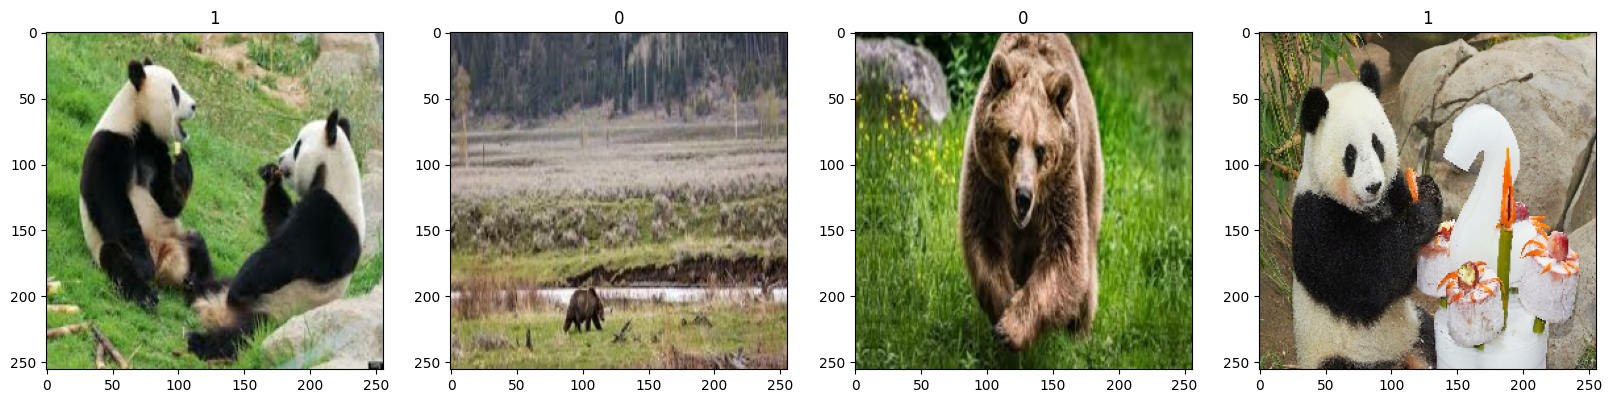

In [97]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Preprocess Data

In [98]:
data=data.map(lambda x,y:(x/255,y))

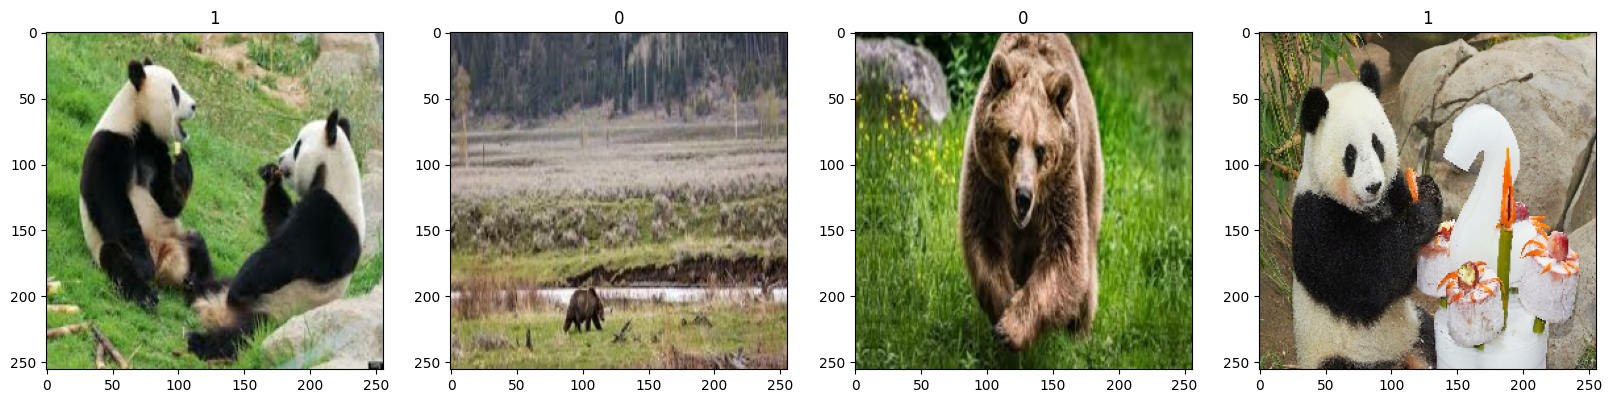

In [99]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [102]:
data.as_numpy_iterator().next()

(array([[[[0.19365808, 0.43679535, 0.15052083],
          [0.2208946 , 0.46338847, 0.1796875 ],
          [0.22316177, 0.46237746, 0.19178921],
          ...,
          [0.16078432, 0.412837  , 0.10481005],
          [0.1640625 , 0.40520832, 0.12555148],
          [0.16099878, 0.40021446, 0.12941177]],
 
         [[0.19166696, 0.43480423, 0.14852971],
          [0.2208946 , 0.46338847, 0.17934193],
          [0.22316177, 0.46237746, 0.19025885],
          ...,
          [0.158678  , 0.4107307 , 0.10155185],
          [0.16195619, 0.403102  , 0.12344516],
          [0.15889247, 0.39810815, 0.12730545]],
 
         [[0.18990198, 0.43303922, 0.14507045],
          [0.22029251, 0.46278638, 0.17844203],
          [0.2240579 , 0.46327358, 0.18983608],
          ...,
          [0.15596661, 0.4086704 , 0.09719663],
          [0.15849568, 0.40053764, 0.11833939],
          [0.15613206, 0.39539674, 0.1235999 ]],
 
         ...,
 
         [[0.25837013, 0.5786627 , 0.34058982],
          [0.24123

In [103]:
scaled_iterator=data.as_numpy_iterator()

In [104]:
scaled_iterator.next()[0].max()

1.0

In [ ]:
#Split Data

In [105]:
len(data)

27

In [106]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [107]:
val_size

5

In [108]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
#Build Deep Learning Model

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [112]:
model=Sequential()

In [113]:
from tensorflow.keras.optimizers import Adam

In [114]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [116]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
#Train

In [118]:
logdir='logs'

In [119]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [131]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
18/18 [==============================] - 17s 923ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 17s 929ms/step - loss: 6.9849e-04 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9875
Epoch 3/20
18/18 [==============================] - 18s 964ms/step - loss: 5.2695e-04 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9812
Epoch 4/20
18/18 [==============================] - 18s 985ms/step - loss: 3.8814e-04 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9812
Epoch 5/20
18/18 [==============================] - 18s 967ms/step - loss: 3.1696e-04 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 0.9937
Epoch 6/20
18/18 [==============================] - 18s 972ms/step - loss: 0.0029 - accuracy: 0.9983 - val_loss: 0.0524 - val_accuracy: 0.9875
Epoch 7/20
18/18 [==============================] - 18s 965ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0768 - val_

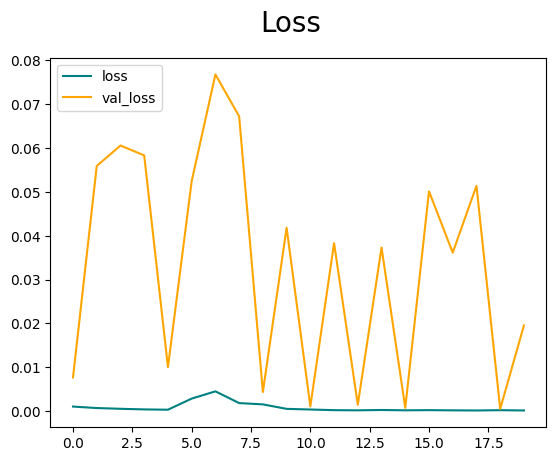

In [132]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

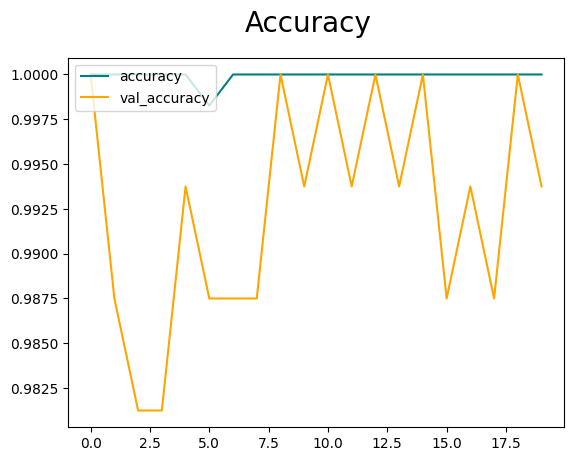

In [133]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [134]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [135]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [136]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 183ms/step


In [137]:
pre.result().numpy()

1.0

In [138]:
re.result().numpy()

1.0

In [139]:
acc.result().numpy()

1.0

In [ ]:
#Test

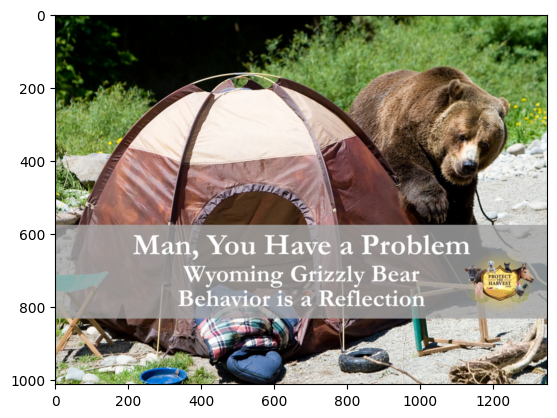

In [141]:
img=cv2.imread('1.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

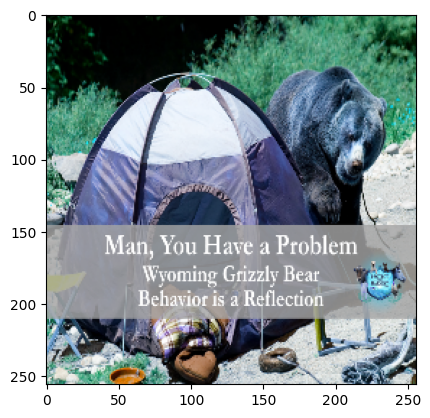

In [142]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [143]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 96ms/step


In [144]:
yhat

array([[0.03304334]], dtype=float32)

In [145]:
if yhat>0.5:
    print(f'Predicted class is Pandas')
else:
    print(f'Predicted class is Grizzly')

Predicted class is Grizzly


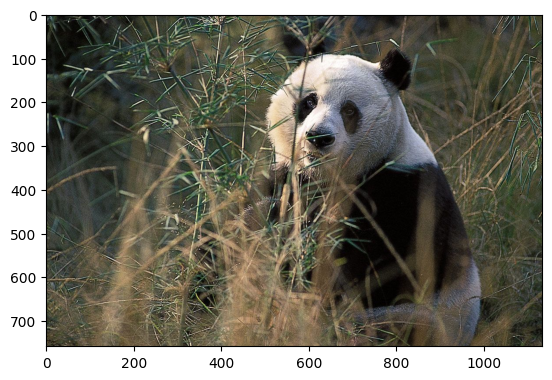

In [146]:
img=cv2.imread('2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

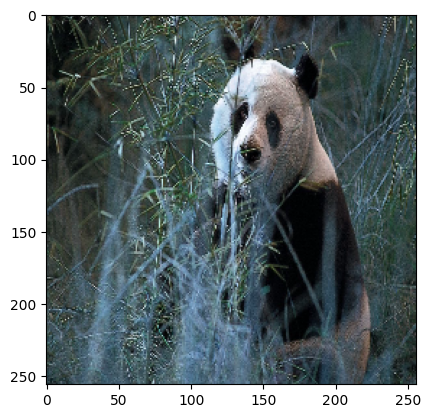

In [147]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [148]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 29ms/step


In [149]:
if yhat>0.5:
    print(f'Predicted class is Pandas')
else:
    print(f'Predicted class is Grizzly')

Predicted class is Pandas


In [ ]:
#Save the Model

In [150]:
from tensorflow.keras.models import load_model

In [151]:
model.save(os.path.join('models','bears.h5'))

In [153]:
new_model=load_model(os.path.join('models','bears.h5'))